In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

from graphs import load_dataset_to_graph
from recreate_graph import get_trained_model, recreate_by_priority_rank
from measurements import get_graph_measurements, compare_graph_measurements, print_comparison_results

Using TensorFlow backend.



Processing highschool_2011
Epoch 1/4
15876/15876 [==============================] - 0s 23us/step - loss: 0.0767 - acc: 0.7832
Epoch 2/4
15876/15876 [==============================] - 0s 19us/step - loss: 0.0103 - acc: 0.7846
Epoch 3/4
15876/15876 [==============================] - 0s 19us/step - loss: 0.0045 - acc: 0.7846
Epoch 4/4
15876/15876 [==============================] - 1s 41us/step
loss: 0.0024753874808392195, accuracy: 0.7846434870244394


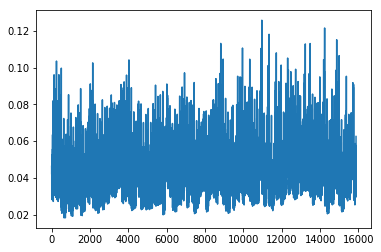

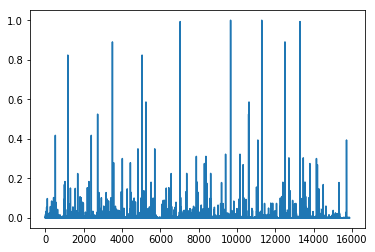

0
1


/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: divide by zero encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


2
3
4
5


/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: invalid value encountered in sqrt
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


6


/home/smoq/.virtualenvs/cna/lib/python3.5/site-packages/networkx/algorithms/assortativity/correlation.py:287: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


7
8
9


In [2]:
prepared_datasets_path = 'prepared_datasets'
prepared_dataframes_path = 'prepared_dataframes'
delimiter = '\t'

prepared_dataset_names = [
    #'primary_school', 'workplace', 
    'highschool_2011', #'highschool_2012', 'hospital', 
    #'moreno_blogs', 'moreno_sheep', 'moreno_seventh'
]
prepare_big_dataset_names = [
    'petster-hamster', 'email-Eu'
]
comparison_list = []
for dataset_name in prepared_dataset_names:
    print('\nProcessing {}'.format(dataset_name))
    dataset_path = os.path.join(prepared_datasets_path, dataset_name)
    dataframe_path = os.path.join(prepared_dataframes_path, dataset_name)
    
    graph = load_dataset_to_graph(dataset_path, node_limit=500)
    
    graph_real_attrs_dataframe_path = os.path.join(dataframe_path, 'graph_real_attrs.csv')
    df = pd.read_csv(graph_real_attrs_dataframe_path, delimiter=delimiter)
    
    model = get_trained_model(df, epochs=4)
    # drop target column
    X_test = df.drop(['num_of_edges'], axis=1)
    # predict num_edges
    y_pred = model.predict(X_test)
    # show predictions and real target values
    plt.figure(1)
    plt.plot(y_pred)
    plt.figure(2)
    plt.plot(df[['num_of_edges']])
    plt.show()
    for i in range(10):
        print(i)
        new_graph = recreate_by_priority_rank(graph, y_pred)

        graph_measurements = get_graph_measurements(graph)
        new_graph_measurements = get_graph_measurements(new_graph)
        comparison = compare_graph_measurements(graph_measurements, new_graph_measurements)
        comparison_list.append(comparison)
    #print_comparison_results(comparison)
    

In [5]:
comparison_list

[OrderedDict([('degree_centrality', 0.0012399744450185212),
              ('closeness_centrality', 0.00075163598658834602),
              ('betweenness_centrality', 7.5885154889784956e-06),
              ('pagerank', 3.9682526029093894e-06),
              ('average_shortest_path_length', 0.06691219607587515),
              ('diameter', 0.25),
              ('degree_centralization', 0.5503878566522026),
              ('closeness_centralization', 0.5835779349408062),
              ('betweenness_centralization', 0.024493261959203722),
              ('pagerank_centralization', 0.5677309332934143),
              ('density', 0.004972214097689335),
              ('degree_assortativity', 0.99999989106079812),
              ('reciprocity', 0.7800650083986668),
              ('transitivity', 0.23672376480416318)]),
 OrderedDict([('degree_centrality', 0.00026291363523941585),
              ('closeness_centrality', 0.0020122867425347471),
              ('betweenness_centrality', 4.8090704592291638